In [2]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error

In [4]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)  # Ensuring reproducibility of random noise 
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

In [11]:
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [15]:
import statsmodels.api as sm  # For OLS Regression
from sklearn.preprocessing import PolynomialFeatures
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)

degree = 2  # You can change this for higher degrees

poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer

X_poly = poly.fit_transform(X)  # Transforming X to polynomial features
print(X_poly)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


In [7]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:16:32   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\CVR\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [20]:
model=LinearRegression()
model.fit(X_poly,Y)
y_pred=model.predict(X_poly)

In [21]:
r2 = r2_score(Y, y_pred)
print("R2_score(R-squared): ",r2)

R2_score(R-squared):  0.9391425186359372


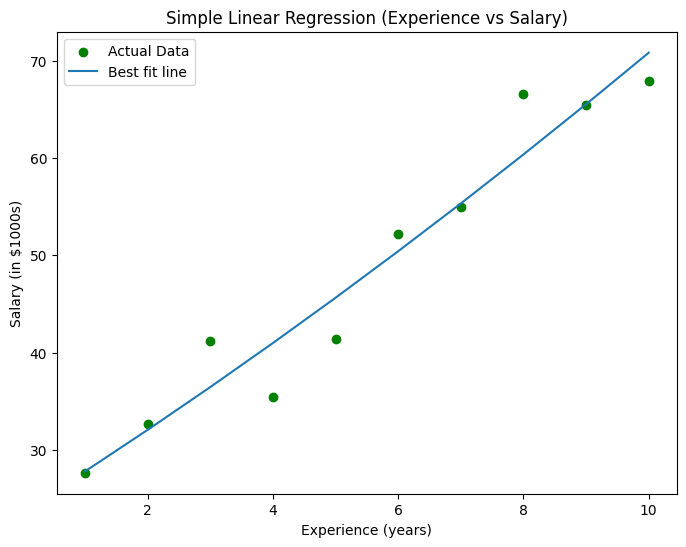

In [23]:
# scatter plot for the actual data
plt.figure(figsize=(8,6))
plt.scatter(X,Y,color='green',label="Actual Data")
# best fit line 
plt.plot(X,y_pred,label="Best fit line")
plt.xlabel("Experience (years)")
plt.ylabel("Salary (in $1000s)")
plt.title("Simple Linear Regression (Experience vs Salary)")
plt.legend()
plt.show()